In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plzgebiete/plz-gebiete.shx
/kaggle/input/plzgebiete/plz-gebiete.shp
/kaggle/input/plzgebiete/zuordnung_plz_ort.csv
/kaggle/input/plzgebiete/plz-gebiete.dbf
/kaggle/input/plzgebiete/plz-gebiete.prj
/kaggle/input/plzgebiete/plz_einwohner.csv
/kaggle/input/apartment-rental-offers-in-germany/immo_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../input/apartment-rental-offers-in-germany/immo_data.csv", dtype={"geo_plz": str})
# Change dtype: I want the postal code as a str, otherwise "00852" will become "852"

In [4]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [5]:
df.shape

(268850, 49)

In [6]:
# Data columns looks not like pandas date type
type(df.date[0])

str

In [7]:
# Transform the string to date type 


In [8]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [9]:
df.isnull().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [10]:
missing_values = ((df.shape[0] - df.isna().sum()) / df.shape[0]).round(3)
missing_values

regio1                      1.000
serviceCharge               0.974
heatingType                 0.833
telekomTvOffer              0.879
telekomHybridUploadSpeed    0.167
newlyConst                  1.000
balcony                     1.000
picturecount                1.000
pricetrend                  0.993
telekomUploadSpeed          0.876
totalRent                   0.849
yearConstructed             0.788
scoutId                     1.000
noParkSpaces                0.346
firingTypes                 0.788
hasKitchen                  1.000
geo_bln                     1.000
cellar                      1.000
yearConstructedRange        0.788
baseRent                    1.000
houseNumber                 0.736
livingSpace                 1.000
geo_krs                     1.000
condition                   0.745
interiorQual                0.581
petsAllowed                 0.574
street                      1.000
streetPlain                 0.736
lift                        1.000
baseRentRange 

In the next steps I will drop irrelevant columns.

In [11]:
missing_values[missing_values < 0.7]

telekomHybridUploadSpeed    0.167
noParkSpaces                0.346
interiorQual                0.581
petsAllowed                 0.574
thermalChar                 0.604
numberOfFloors              0.636
heatingCosts                0.318
energyEfficiencyClass       0.289
lastRefurbish               0.300
electricityBasePrice        0.174
electricityKwhPrice         0.174
dtype: float64

In [12]:
df.drop(list(missing_values[missing_values < 0.7].index), axis=1, inplace=True)

df.shape

(268850, 38)

In [13]:
# Drop NaNs (?) -> we will lose around 200k rows
#df.dropna(inplace=True)
#df.shape

In [14]:
# Time periode of the data set
df.date.min(), df.date.max()

('Feb20', 'Sep18')

In [15]:
df.describe().round()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,floor,noRoomsRange,livingSpaceRange
count,261941.0,268850.0,267018.0,235492.0,228333.0,211805.0,268850.0,211805.0,268850.0,268850.0,268850.0,268850.0,217541.0,268850.0,268850.0
mean,151.0,10.0,3.0,29.0,901.0,1966.0,106969670.0,4.0,694.0,74.0,4.0,3.0,2.0,3.0,3.0
std,308.0,6.0,2.0,16.0,33238.0,47.0,12500933.0,3.0,19536.0,255.0,2.0,3.0,4.0,1.0,1.0
min,0.0,0.0,-12.0,1.0,0.0,1000.0,28871743.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,1.0
25%,95.0,6.0,2.0,10.0,470.0,1950.0,106691034.0,1.0,338.0,54.0,2.0,2.0,1.0,2.0,2.0
50%,135.0,9.0,3.0,40.0,650.0,1973.0,111158376.0,3.0,490.0,67.0,3.0,3.0,2.0,3.0,3.0
75%,190.0,13.0,5.0,40.0,985.0,1996.0,113768760.0,5.0,799.0,87.0,5.0,3.0,3.0,3.0,4.0
max,146118.0,121.0,15.0,100.0,15751535.0,2090.0,115711743.0,9.0,9999999.0,111111.0,9.0,1000.0,999.0,5.0,7.0


### What metric can be used for price?

The following columns could be interesting: totalRent, baseRent, baseRentRange, heatingCosts (was dropped), pricetrend

In [16]:
df[["totalRent","baseRent", "baseRentRange","pricetrend"]].head()

,totalRent,baseRent,baseRentRange,pricetrend
0,840.0,595.0,4,4.62
1,NaN,800.0,5,3.47
2,1300.0,965.0,6,2.72
3,NaN,343.0,2,1.53
4,903.0,765.0,5,2.46


In [17]:
df[["totalRent","baseRent", "baseRentRange","pricetrend"]].describe()

,totalRent,baseRent,baseRentRange,pricetrend
count,2.283330e+05,2.688500e+05,268850.000000,267018.000000
mean,9.013315e+02,6.941294e+02,3.765256,3.389001
std,3.323833e+04,1.953602e+04,2.214357,1.964874
min,0.000000e+00,0.000000e+00,1.000000,-12.330000
25%,4.698000e+02,3.380000e+02,2.000000,2.000000
50%,6.500000e+02,4.900000e+02,3.000000,3.390000
75%,9.850000e+02,7.990000e+02,5.000000,4.570000
max,1.575154e+07,9.999999e+06,9.000000,14.920000


baseRentRange and pricetrend don't look useful

In [18]:
# Which column has less missing data?
print("Total Rent:", missing_values["totalRent"])
print("Base Rent:", missing_values["baseRent"])

Total Rent: 0.849
Base Rent: 1.0


TotalRent seems fine but the column description show us that the total rent is usually a sum of base rent, service charge and heating cost. 

In [19]:
# What percentage of the data is available? 
print("Heating Costs:", missing_values["heatingCosts"])
print("Service Charge:", missing_values["serviceCharge"])

Heating Costs: 0.318
Service Charge: 0.974


Almost 70% of the data from the heating costs is missing, so totalRent would not be really accurate. For this reason we use baseRent.

If you look at www.immobilienscout24.de and take a closer look at the costs, it quickly becomes clear that the total costs are on average about 20% higher than the basic rent. We can keep that in mind.

In [20]:
# 0 values are not possible and it will return inf numbers if we want to calculate the m2 price 
df["livingSpace"].describe()

count    268850.000000
mean         74.355548
std         254.759208
min           0.000000
25%          54.000000
50%          67.320000
75%          87.000000
max      111111.000000
Name: livingSpace, dtype: float64

In [21]:
df.shape

(268850, 38)

In [22]:
df[df["livingSpace"] == 0].index

Int64Index([  3444,   6601,  11127,  15014,  17278,  18433,  20165,  27339,
             30124,  30982,  33083,  33595,  34612,  35630,  40629,  63174,
             67648,  69577,  70482,  71569,  75213,  77146,  77381,  78489,
             86437,  91491,  92982,  93073,  94343,  97255, 106586, 115056,
            115921, 119028, 119150, 119711, 120544, 120972, 124278, 132002,
            135088, 137334, 138819, 140420, 141794, 142114, 145902, 151681,
            153600, 162195, 165063, 169929, 175135, 182693, 186918, 187186,
            195037, 199402, 203713, 208913, 213220, 219914, 223897, 228138,
            228960, 229099, 231174, 232236, 238489, 243369, 247111, 248599,
            254055, 266160, 267604],
           dtype='int64')

In [23]:
# I will drop rows with a value of zero
for row in df[df["livingSpace"] == 0].index: 
    df.drop(index=row, inplace=True)

In [24]:
df.shape

(268775, 38)

In [25]:
# Can I find more unrealistic values in baseRent & livingSpace? 
df[["baseRent", "livingSpace"]].describe().round()

,baseRent,livingSpace
count,268775.0,268775.0
mean,694.0,74.0
std,19539.0,255.0
min,0.0,1.0
25%,338.0,54.0
50%,490.0,67.0
75%,799.0,87.0
max,9999999.0,111111.0


In [26]:
# Find the unrealistic values and some outliers
df["baseRent"].quantile(q=0.995)

3000.0

In [27]:
df["baseRent"].quantile(q=0.005)

153.0

In [28]:
df["livingSpace"].quantile(q=0.995)

208.0

In [29]:
df["livingSpace"].quantile(q=0.005)

18.0

In [30]:
# Delete them 
df = df[df.baseRent.between(153,3000, inclusive=True)]
df = df[df.livingSpace.between(18,208, inclusive=True)]

In [31]:
# Price per m2
df["m2_price"] =  (df["baseRent"] / df["livingSpace"]).round()

In [32]:
df["m2_price"].describe().round()

count    264142.0
mean          9.0
std           4.0
min           2.0
25%           6.0
50%           7.0
75%          10.0
max         100.0
Name: m2_price, dtype: float64

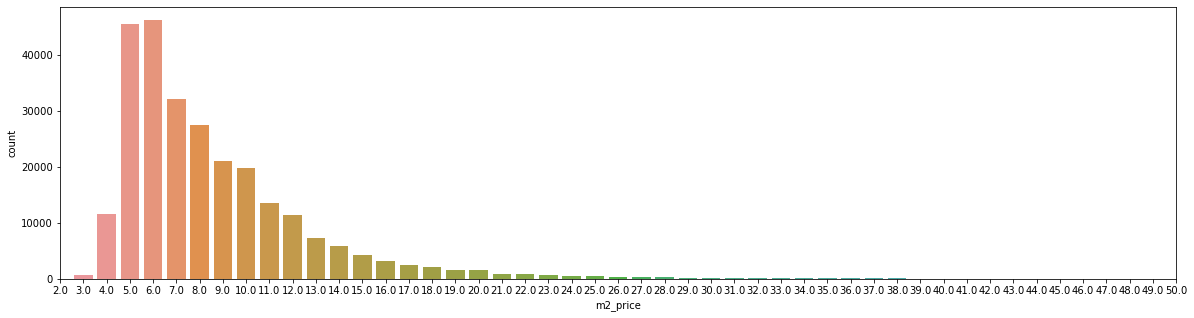

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(df["m2_price"])
plt.xlim(0,48);

What is the mean price and m2 price per state? 

In [34]:
# Mean Price
mean_price_s = df.groupby(["regio1"])["baseRent"].mean().astype(int)
mean_price_s.sort_values(ascending=False)

regio1
Hamburg                   1120
Berlin                    1057
Bayern                     958
Baden_Württemberg          944
Hessen                     927
Rheinland_Pfalz            678
Schleswig_Holstein         643
Bremen                     607
Niedersachsen              597
Nordrhein_Westfalen        588
Saarland                   580
Brandenburg                506
Sachsen                    435
Mecklenburg_Vorpommern     423
Thüringen                  390
Sachsen_Anhalt             369
Name: baseRent, dtype: int64

In [35]:
# m2 Price
m2_price_s = df.groupby(["regio1"])["m2_price"].mean().astype(int)
m2_price_s.sort_values(ascending=False)

regio1
Hamburg                   14
Berlin                    13
Bayern                    13
Hessen                    12
Baden_Württemberg         11
Schleswig_Holstein         8
Rheinland_Pfalz            8
Bremen                     8
Saarland                   7
Nordrhein_Westfalen        7
Niedersachsen              7
Brandenburg                7
Sachsen                    6
Mecklenburg_Vorpommern     6
Thüringen                  5
Sachsen_Anhalt             5
Name: m2_price, dtype: int64

---

# Map Visualization

In the following, various map visualizations are made to better represent certain factors. The guidance of Dr. Juan Camilo Orduz is followed.

Useful links:
* https://juanitorduz.github.io/germany_plots/

In [36]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

In [37]:
# Load the plz shapefile of Germany with GeoPandas

plz_df = gpd.read_file("../input/plzgebiete/plz-gebiete.shp", dtype={"plz": str})
plz_df.head()

,plz,note,geometry
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ..."
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ..."
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ..."
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ..."


"The geometry column contains the polygons which define the postal code’s shape."

In [38]:
# Get the different states ("Bundesland")
region_df = pd.read_csv("../input/plzgebiete/zuordnung_plz_ort.csv", sep=",", dtype={"plz": str})
region_df.head()

,osm_id,ort,plz,bundesland
0,1104550,Aach,78267,Baden-Württemberg
1,1255910,Aach,54298,Rheinland-Pfalz
2,62564,Aachen,52062,Nordrhein-Westfalen
3,62564,Aachen,52064,Nordrhein-Westfalen
4,62564,Aachen,52066,Nordrhein-Westfalen


In [39]:
# Drop osm_id
region_df.drop("osm_id", axis=1, inplace=True)

# Drop "note" from plz_df because the city ("ort") appears already in the region_df
plz_df.drop("note", axis=1, inplace=True)

In [40]:
# Merge the two dataframes on "plz"
ger_df = plz_df.merge(region_df, how="inner", on="plz")
ger_df.head()

,plz,geometry,ort,bundesland
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",Gangelt,Nordrhein-Westfalen
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",Selfkant,Nordrhein-Westfalen
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",Kranenburg,Nordrhein-Westfalen
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",Heinsberg,Nordrhein-Westfalen
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",Waldfeucht,Nordrhein-Westfalen


In [41]:
# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

In [42]:
# Number of Inhabitants per postal code 
einwohner_df = pd.read_csv('../input/plzgebiete/plz_einwohner.csv', sep=',', dtype={'plz': str, 'einwohner': int})
einwohner_df.head()

,plz,einwohner
0,01067,11957
1,01069,25491
2,01097,14821
3,01099,28018
4,01108,5876


In [43]:
# Merge it to the ger_df
ger_df = ger_df.merge(einwohner_df, how="inner", on="plz")
ger_df.head()

,plz,geometry,ort,bundesland,einwohner
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",Gangelt,Nordrhein-Westfalen,21390
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",Selfkant,Nordrhein-Westfalen,21390
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",Kranenburg,Nordrhein-Westfalen,10220
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",Heinsberg,Nordrhein-Westfalen,49737
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",Waldfeucht,Nordrhein-Westfalen,49737


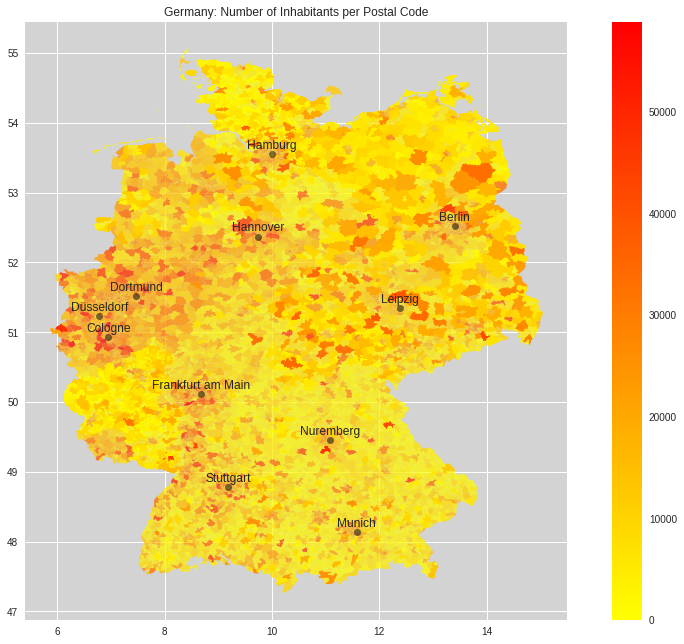

In [44]:
# Plot the map
plt.rcParams['figure.figsize'] = [16, 11]

fig, ax = plt.subplots()

ger_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for city in top_cities.keys():

    ax.text(
        x=top_cities[city][0], 
        y=top_cities[city][1] + 0.08, 
        s=city, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[city][0], 
        top_cities[city][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightgray'
);

In [45]:
# Focus on one city is possible through a filter

def city_map(city):
    q = 'ort == "' + city + '"'
    city_df = ger_df.query(q)

    fig, ax = plt.subplots()

    city_df.plot(
        ax=ax, 
        column='einwohner', 
        categorical=False, 
        legend=True, 
        cmap='autumn_r',
    )

    ax.set(
        title= city + ': Number of Inhabitants per Postal Code', 
        aspect=1.3, 
        facecolor='lightgray'
    );

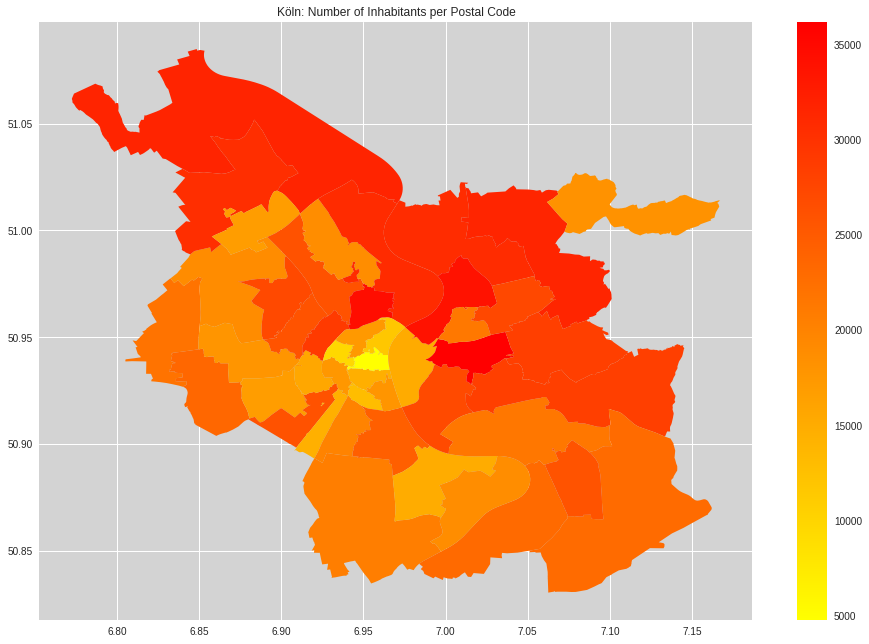

In [46]:
city_map("Köln")

In the next step I try to add the apartment prices per city. Thus, price differences within the different cities should become directly visible. 

In [47]:
mean_price_df = pd.DataFrame(df.groupby(["geo_plz"])["baseRent"].mean().astype(int))
mean_price_df.head()

,baseRent
geo_plz,
01057,393
01067,1054
01069,612
01097,674
01099,610


In [48]:
# Rename columns to join on "plz"
mean_price_df = mean_price_df.reset_index()
mean_price_df.columns = ["plz","Mean Price"]
mean_price_df.head()

,plz,Mean Price
0,01057,393
1,01067,1054
2,01069,612
3,01097,674
4,01099,610


In [49]:
ger_df = ger_df.merge(mean_price_df, how="inner", on="plz")

In [50]:
ger_df.head()

,plz,geometry,ort,bundesland,einwohner,Mean Price
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",Gangelt,Nordrhein-Westfalen,21390,606
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",Selfkant,Nordrhein-Westfalen,21390,606
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",Kranenburg,Nordrhein-Westfalen,10220,588
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",Heinsberg,Nordrhein-Westfalen,49737,545
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",Waldfeucht,Nordrhein-Westfalen,49737,545


In [51]:
ger_df.shape

(13399, 6)

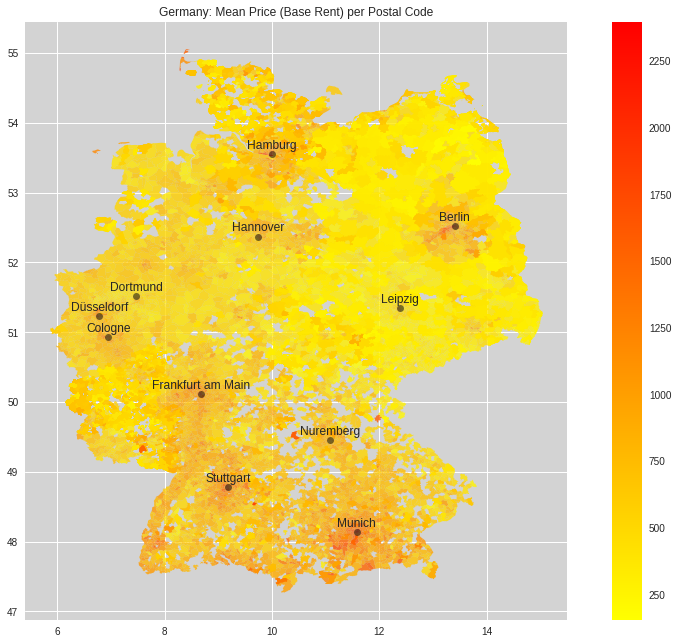

In [52]:
# Plot the map
plt.rcParams['figure.figsize'] = [16, 11]

fig, ax = plt.subplots()

ger_df.plot(
    ax=ax, 
    column='Mean Price', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for city in top_cities.keys():

    ax.text(
        x=top_cities[city][0], 
        y=top_cities[city][1] + 0.08, 
        s=city, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[city][0], 
        top_cities[city][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Mean Price (Base Rent) per Postal Code', 
    aspect=1.3, 
    facecolor='lightgray'
);

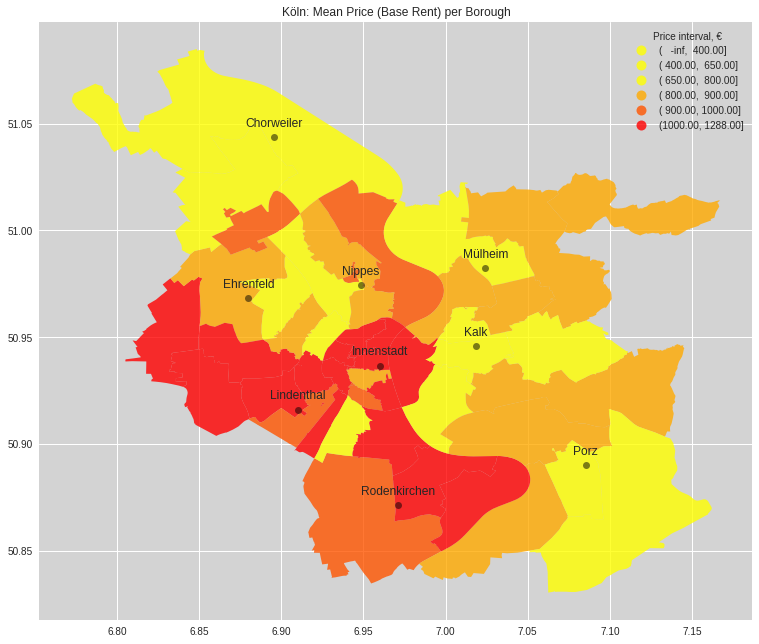

In [66]:
# Focus on Cologne 

cologne_boroughs = {
    'Innenstadt': (6.960278, 50.936667),
    'Rodenkirchen': (6.971111, 50.871389),
    'Lindenthal': (6.91, 50.916111),
    'Ehrenfeld': (6.88, 50.968389),
    'Nippes': (6.948333, 50.974444),
    'Chorweiler': (6.895639, 51.043778),
    'Porz': (7.085278, 50.89000),
    'Kalk': (7.018611, 50.945833),
    'Mülheim':(7.024167, 50.982222) 
}



borough_df = ger_df.query("ort == 'Köln'")

fig, ax = plt.subplots()

borough_df.plot(
    ax=ax, 
    column='Mean Price', 
    categorical=False, 
    legend=True,
    cmap='autumn_r',
    alpha=0.8
)

ax.set(
    title= 'Köln: Mean Price (Base Rent) per Borough', 
    aspect=1.3, 
    facecolor='lightgray'
);

for borough in cologne_boroughs.keys():

    ax.text(
        x=cologne_boroughs[borough][0], 
        y=cologne_boroughs[borough][1] + 0.005, 
        s=borough, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        cologne_boroughs[borough][0], 
        cologne_boroughs[borough][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

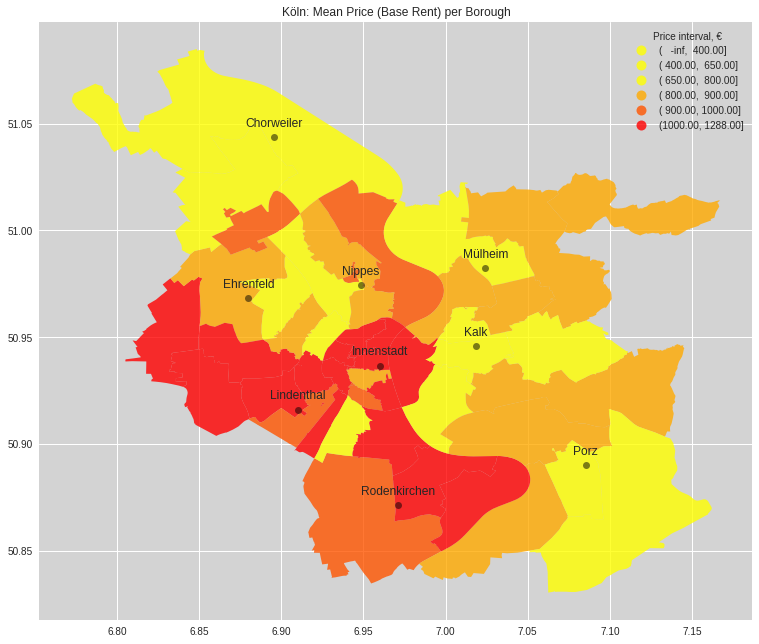

In [68]:
# Try with different mean price intervals 

borough_df = ger_df.query("ort == 'Köln'")

fig, ax = plt.subplots()

borough_df.plot(
    ax=ax, 
    column='Mean Price', 
    categorical=False, 
    legend=True,
    legend_kwds={'title': 'Mean Price Intervals', 'loc': 'upper right'},
    cmap='autumn_r',
    scheme="User_Defined",
    classification_kwds={'bins':[400, 600, 800, 1000]},
    alpha=0.8
)

ax.set(
    title= 'Köln: Mean Price (Base Rent) per Borough', 
    aspect=1.3, 
    facecolor='lightgray'
);

for borough in cologne_boroughs.keys():

    ax.text(
        x=cologne_boroughs[borough][0], 
        y=cologne_boroughs[borough][1] + 0.005, 
        s=borough, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        cologne_boroughs[borough][0], 
        cologne_boroughs[borough][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

Ideas: 
* Quick EDA + basic Plots 
* Fokus auf NRW (Map + Plots)
     --> Mean Price per Bundesland & Cities (NRW)
* Einwohner in Verhältnis setzen (zu?)
* Mean Price Vergleich zu Hauseigenschaften 
* Data Cleaning (unrealistic values?) 

**Publish on kaggle**